---
title: "from AR to ARIMA"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Up to this point, we learned what an AR process is, and how it relates to the concept of stationarity.

Our long term goal is to use these concepts to make forecasts (predictions) about the future. Before we do that, it is useful to talk about a generalization of the AR process, that better resembles real-life data.

## AR(p)

An **autoregressive** process $X$ is one that depend on $p$ past states:

$$
X_{t} = \phi_1\,X_{t-1} + \phi_2\,X_{t-2} + \cdots + \phi_p\,X_{t-p} + \varepsilon
$$

From what we already learned, if the complex roots of the polynomial

$$
\phi(B) = 1 - \phi_1\, B - \phi_2\,B^2 - \cdots - \phi_p\,B^p
$$

lie **outside** the unit circle, then the AR process is **causal and stationary**.

## MA(q)

Similarly, a **moving average** process $X$ is one that depend on $q$ past noise steps:

$$
X_{t} = \varepsilon_t + \theta_1\,\varepsilon_{t-1} + \theta_2\,\varepsilon_{t-2} + \cdots + \theta_p\,\varepsilon_{t-q}
$$

This has nothing to do with the sliding averages used for smoothing we studied before, it's just the same name for a different concept.

Note that this equation is identical in structure to that of AR(p), but with weights $\theta$ standing for $\phi$, and past noise $\varepsilon_{t-i}$ standing in for past states $X_{t-i}$.

This process also has its characteristic polynomial:

$$
\theta(B) = 1 - \theta_1\, B - \theta_2\,B^2 - \cdots - \theta_p\,B^p
$$

The complex roots of this polynomial are also important. As long as the roots are **outside** the unit circle, the MA(q) process will be considered **invertible**, which is to say that it can be transformed into an AR($\infty$) process.

::: {.column-margin}
The story is of course more complex than that. Using intelligent mathematical tricks (substitutions), one can change the noise term to make roots move from inside the unit circle to the outside, so effectively there shouldn't be any problems as long as there aren't any roots exacly on the unit circle.
:::

## ARMA(p,q)

An ARMA(p,q) process is simply the combination of an AR(p) and an MA(q) process:

$$
\begin{split}
X_{t} &= \phi_1\,X_{t-1} + \phi_2\,X_{t-2} + \cdots + \phi_p\,X_{t-p} \\
      &+ \varepsilon_t + \theta_1\,\varepsilon_{t-1} + \theta_2\,\varepsilon_{t-2} + \cdots + \theta_p\,\varepsilon_{t-p}
\end{split}
$$

## ACF and PACF

The graphs for the autocorrelation and partial autocorrrelation functions can be very useful to identify the order $p$ and $q$ of an ARMA(p,q) process.

In [1]:
#| code-summary: "import stuff"
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller

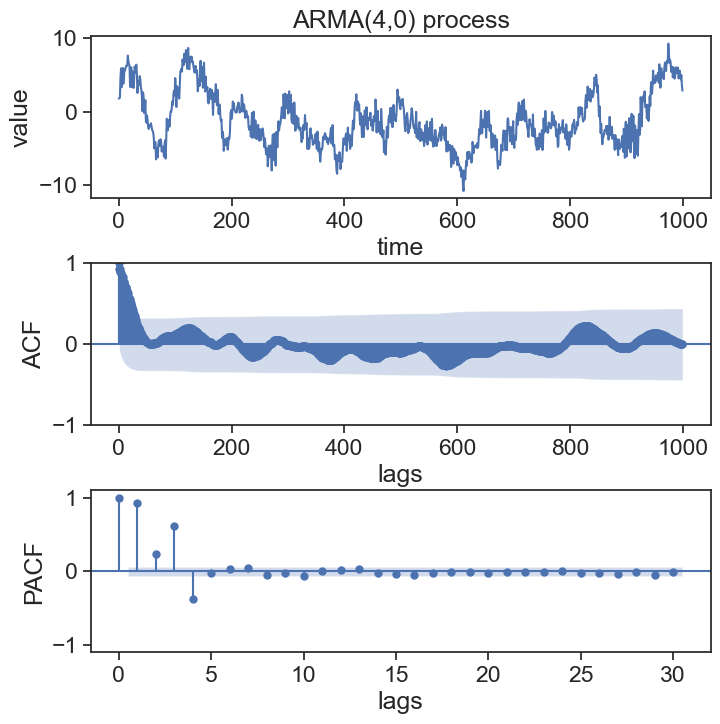

In [2]:
#| code-summary: "generate ARMA(4,0) process"
np.random.seed(0)
n = 1000  # number of data points
phi_list = np.array([0.8, -0.28, 0.8, -0.36])
ar_coefs = np.insert(-phi_list, 0, 1)  # AR coefficients. append 1 at the beginning
ma_coefs = [1] # MA coefficients

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)  # increase vertical space between panels

ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(4,0) process',
       )

# plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=n-1, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

Note that for the ARMA(4,0) process, the last significant PACF value is at lag $\tau=4$.

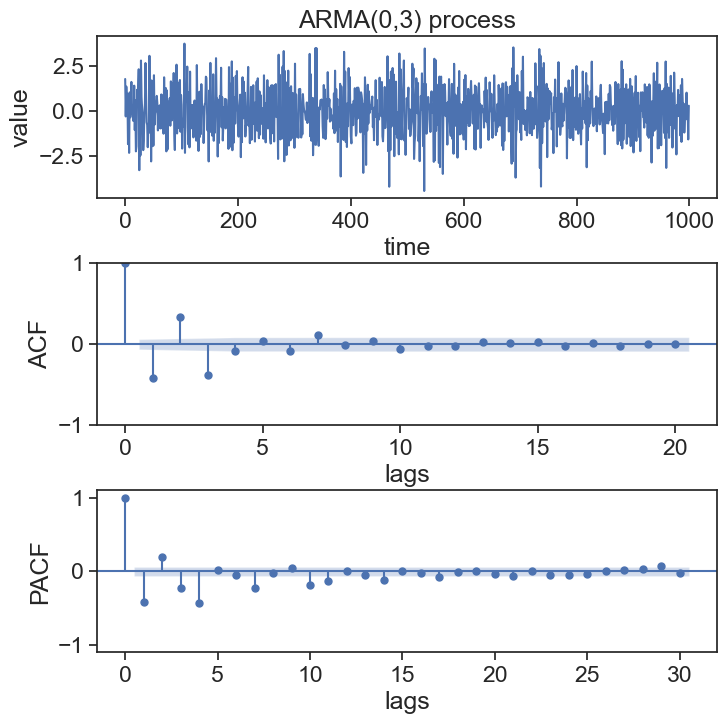

In [3]:
#| code-summary: "generate ARMA(0,3) process"
np.random.seed(0)
n = 1000  # number of data points
theta_list = np.array([0.4, -0.3, 0.8])
ma_coefs = np.insert(-theta_list, 0, 1)  # MA coefficients. append 1 at the beginning
ar_coefs = [1]

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)

ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(0,3) process',
       )

# plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=20, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

For the ARMA(0,3) process, the last significant ACF value is at lag $\tau=3$.

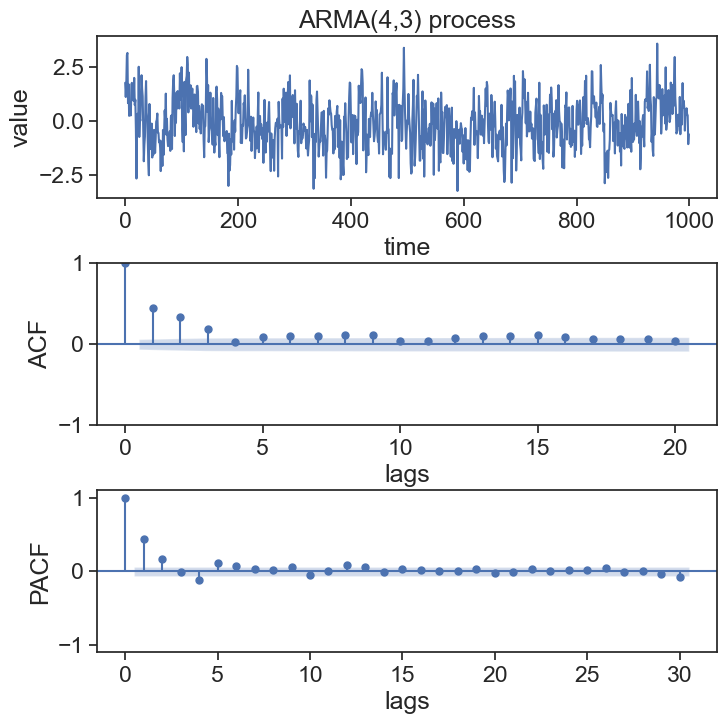

In [4]:
#| code-summary: "generate ARMA(4,3) process"
np.random.seed(0)
n = 1000  # number of data points
theta_list = np.array([0.4, -0.3, 0.8])
phi_list = np.array([0.8, -0.28, 0.8, -0.36])
ar_coefs = np.insert(-phi_list, 0, 1)  # AR coefficients
ma_coefs = np.insert(-theta_list, 0, 1)  # MA coefficients

arma_process = ArmaProcess(ar_coefs, ma_coefs)
data = arma_process.generate_sample(nsample=n)

# Create a single figure with panels
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)


# Plot the ARMA process
ax1 = axes[0]
ax1.plot(data)
ax1.set(xlabel='time',
        ylabel='value',
        title='ARMA(4,3) process',
       )

# Plot ACF and PACF graphs
ax2 = axes[1]
sm.graphics.tsa.plot_acf(data, lags=20, ax=ax2, title=None)
ax2.set(ylabel="ACF",
        xlabel="lags")

ax3 = axes[2]
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax3, title=None)
ax3.set(ylim=[-1.1, 1.1],
        ylabel='PACF',
        xlabel="lags");

This table from @shumway2017time[p. 108] is useful to sum up what we've learned so far.

|      | AR(p)                | MA(q)                | ARMA(p,q)           |
|------|----------------------|----------------------|---------------------|
| **ACF**  | gradually goes down  | cuts off after lag q | gradually goes down |
| **PACF** | cuts off after lag p | gradually goes down  | gradually goes down |

## Non-stationary data and ADF test

The following is partially based on @chatfield2016analysis[chapter 3, page 63].

What do we do if it turns out that our data is not stationary? Heck, how can we even tell if our data is stationary or not? The most common stationarity test is the Augmented Dickey–Fuller (ADF) test. This is not a trivial subject that can be completely understood in a few words, so I'll give the very basic intuition here.

A stationary time series has a constant mean $\mu$. If at a given instant $t$ our state $X_t$ is way above the mean, we would expect that, with a high probability, the next step brings it closer to the mean. This is to say that the the difference between two consecutive states $X_t-X_{t-1}$ depends on the value of $X_t$! Nonstationary time series do not show this behavior: the differences between two time steps do not depend on the state value. The idea described here is for the Dickey-Fuller test. The Augmented Dickey-Fuller test is basically the same, but for time lags $p$ between states, not only 1.

The ADF test has a null hypothesis that the time series is **not stationary**. By applying the test to a given time series, we get a p-value as one of the results. The smaller the p-value, the more evidence we have to reject the null hypothesis, and therefore conclude that our time series is indeed stationary.

Let's see an example:

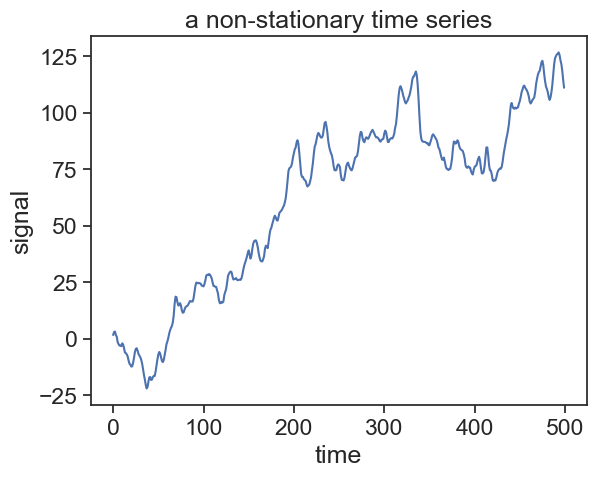

p-value:  0.591478751185507


In [5]:
# Generate ARIMA(1,1,2) process with differencing
N = 500
np.random.seed(1)
arima_112_diff = sm.tsa.arma_generate_sample(ar=[1, -0.5], ma=[1, 0.7, 0.3], nsample=N)
arima_112 = np.cumsum(arima_112_diff)

fig, ax = plt.subplots()
ax.plot(arima_112)
ax.set(xlabel="time",
       ylabel="signal",
       title="a non-stationary time series")
plt.show()

result = adfuller(arima_112)
print('p-value: ', result[1])

So what do we do if we have a non-stationary time series? One common solution is to apply successive **differencing** operations, until the outcome becomes stationary.

Let's define the difference operator $\nabla$ as

$$
\nabla X_t = X_t - X_{t-1}.
$$

Now recalling that the backward shift operator $B$ is defined as

$$
B X_t = X_{t-1},
$$

we can rewrite the difference operator as

$$
\begin{split}
\nabla X_t &= X_t - BX_t\\
           &= (1-B)X_t.
\end{split}
$$

If we apply the difference operator $d$ times, then we denote this as

$$
W_t = \nabla^d X_t = (1-B)^d X_t.
$$

Let's apply the difference operator once to the time series plotted above, and then apply the ADF test.

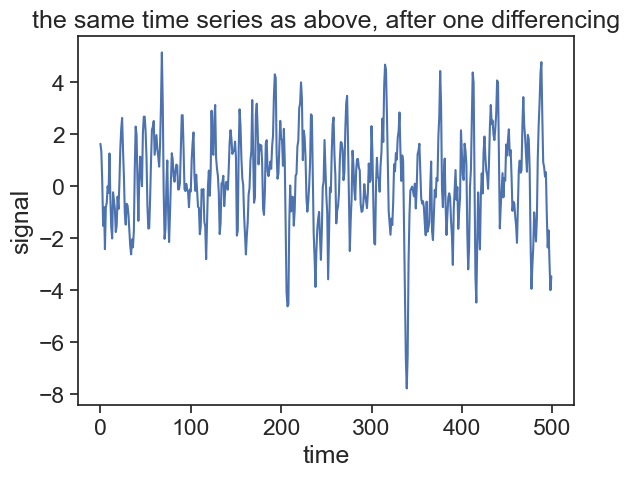

p-value:  4.7341140554650393e-14


In [6]:
fig, ax = plt.subplots()
ax.plot(arima_112_diff)
ax.set(xlabel="time",
       ylabel="signal",
       title="the same time series as above, after one differencing")
plt.show()

result = adfuller(arima_112_diff)
print('p-value: ', result[1])





## ARIMA(p,d,q)

We are ready to describe an Autoregressive (AR) Integrated (I) Moving Average (MA) process:

$$
\begin{split}
W_t &= \phi_1 W_{t-1} + \phi_2 W_{t-2}+\cdots \phi_q W_{t-q} \\
    &+ \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2}+\cdots \theta_q \varepsilon_{t-q}
\end{split}
$$

Rearranging the terms in this equation, we can also express an ARIMA(p,d,q) process as

$$
\phi(B)(1-B)^d X_t = \theta(B)\epsilon_t.
$$

Let's try to put this in a context we already know. We saw that a random walk is the integrated version of a white noise. The random walk can be interpreted as a special case of an AR(1) process for $\phi=1$. However, an AR process is usually called as such when it is stationary. Because a white noise can be understood as an ARMA(0,0) process, and because differencing the random walk yields a white noise, we can say that the white noise is an ARIMA(0,1,0) process.

Let's see two examples of ARIMA processes.

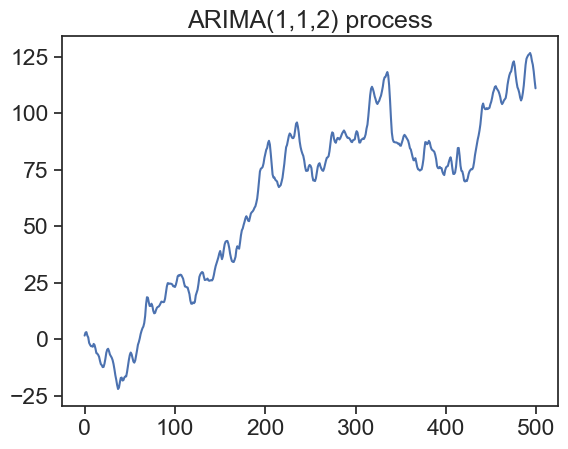

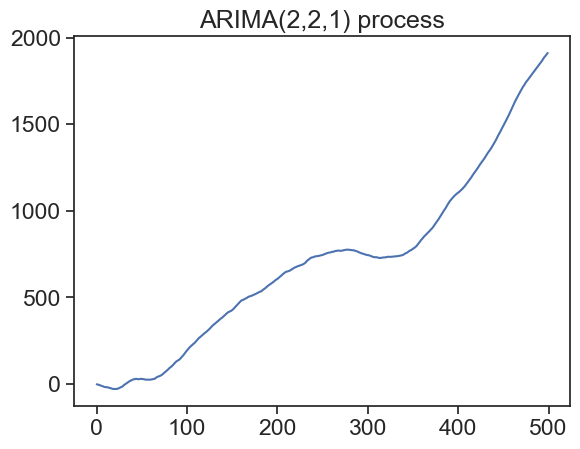

In [7]:


# Generate ARIMA(2,2,1) process with differencing
arima_221_diff = sm.tsa.arma_generate_sample(ar=[1, -0.18, 0.06], ma=[1, -0.5], nsample=N)
# arima_221 = np.cumsum(arima_221_diff) 
arima_221 = np.cumsum(np.cumsum(arima_221_diff)) # 

# Plot the ARIMA(1,1,2) process
fig, ax = plt.subplots()
ax.plot(arima_112)
ax.set_title('ARIMA(1,1,2) process')
plt.show()

# Plot the ARIMA(2,2,1) process
fig, ax = plt.subplots()
ax.plot(arima_221)
ax.set_title('ARIMA(2,2,1) process')
plt.show()


We will not fully delve into forecasting right now, but it would be nice to see a real application of ARIMA. If we can reasonably well estimate the parameters associated with a given ARIMA(p,d,q) process, we can use this knowledge to predict future states within a confidence interval. In the simulations below, we see forecasts an ARIMA(2,2,0) process.

In [8]:
#| code-summary: "write function to forecast"
def arima_forecast(series, ar_coeff):
    s = series.copy()
    phi1 = -ar_coeff[1]
    phi2 = -ar_coeff[2]
    start_index = np.argmax(np.isnan(s))
    for i in np.arange(start_index,len(series)):
        s[i] = phi1 * s[i-1] + phi2 * s[i-2] + np.random.normal()
    return s

np.random.seed(1998)
arima_220_diff = sm.tsa.arma_generate_sample(ar=[1, -0.18, 0.06], ma=[1], nsample=N)
arima_220 = np.cumsum(np.cumsum(arima_220_diff)) # 


l = 380
missing = arima_220_diff.copy()
missing[l:] = np.nan

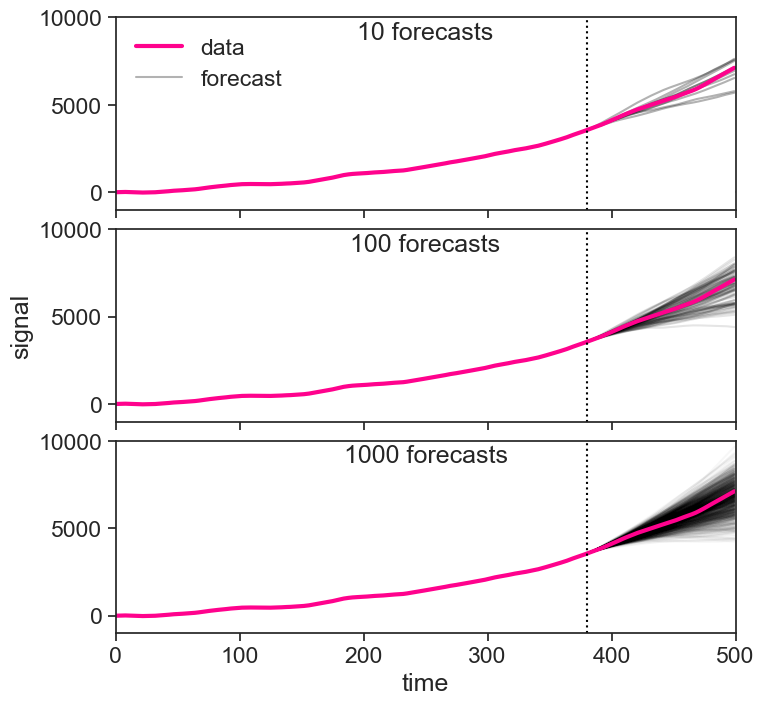

In [9]:
#| code-summary: "plot forecasts"
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1)

xlim = [0, len(missing)]
ylim = [-1000,10000]

ax0 = axes[0]
ntries = 10
for i in range(ntries):
    np.random.seed(i)
    try_diff = arima_forecast(missing, [1, -0.18, 0.06])
    t = np.cumsum(np.cumsum(try_diff))
    ax0.plot(t, color="black", alpha=0.3)
ax0.plot(arima_220, color="xkcd:hot pink", lw=3, label="data")
ax0.plot([len(missing),len(missing)+1], [0]*2, color="black", alpha=0.3, label="forecast")
ax0.set(xticklabels=[],
        xlim=xlim,
        ylim=ylim)
ax0.text(0.5, 0.98, f"{ntries} forecasts",
         transform=ax0.transAxes, ha="center", va="top")
ax0.legend(frameon=False)
ax0.plot([380]*2, ylim, color="black", ls=":")

ax1 = axes[1]
ntries = 100
for i in range(ntries):
    np.random.seed(i)
    try_diff = arima_forecast(missing, [1, -0.18, 0.06])
    t = np.cumsum(np.cumsum(try_diff))
    ax1.plot(t, color="black", alpha=0.1)
ax1.plot(arima_220, color="xkcd:hot pink", lw=3)
ax1.set(xticklabels=[],
        ylabel="signal",
        xlim=xlim,
        ylim=ylim)
ax1.text(0.5, 0.98, f"{ntries} forecasts",
         transform=ax1.transAxes, ha="center", va="top")
ax1.plot([380]*2, ylim, color="black", ls=":")


ax2 = axes[2]
ntries = 1000
for i in range(ntries):
    np.random.seed(i)
    try_diff = arima_forecast(missing, [1, -0.18, 0.06])
    t = np.cumsum(np.cumsum(try_diff))
    ax2.plot(t, color="black", alpha=0.03)
ax2.plot(arima_220, color="xkcd:hot pink", lw=3)
ax2.set(xlabel='time',
        xlim=xlim,
        ylim=ylim)
ax2.text(0.5, 0.98, f"{ntries} forecasts",
         transform=ax2.transAxes, ha="center", va="top")
ax2.plot([380]*2, ylim, color="black", ls=":")

We will discuss this later in the course, but estimating the parameters is quite easy:

In [10]:
#| code-fold: false
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(arima_220, order=(2,2,0))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -703.606
Date:                Tue, 06 Feb 2024   AIC                           1413.212
Time:                        13:12:24   BIC                           1425.844
Sample:                             0   HQIC                          1418.170
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2171      0.045      4.782      0.000       0.128       0.306
ar.L2          0.0636      0.045      1.401      0.161      -0.025       0.153
sigma2         0.9878      0.072     13.739      0.0